In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../plotMithraPy')
import plotMiFuncs as pmf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
from datetime import date
import numpy as np
import pandas as pd
import os

raw_data = []

###########################################################################################
###########################################################################################
# Instantiate basic stuff
fs = 14
footnote = 'Albà, ' + str(date.today())
for_report = True
pltpath = 'tests/plots'

raw_data.append( ['tests/new_injected', 'OPAL injected, dz = 100 nm, N = 5e5' ] )
raw_data.append( ['tests/new_emitted', 'OPAL emitted, dz = 100 nm, N = 5e5' ] )
raw_data.append( ['tests/new_emitted_5e4', 'OPAL emitted, dz = 100 nm, N = 5e4' ] )
raw_data.append( ['tests/latest_emitted_5e4', 'latest emitted, dz = 100 nm, N = 5e4' ] )
# raw_data.append( ['tests/twocoretest', 'OPAL emitted, dz = 100 nm, N = 5e5' ] )
# raw_data.append( ['tests/injectTestRemove', 'OPAL injected, dz = 100 nm, N = 5e5' ] )

###########################################################################################
###########################################################################################

leg = []
fnames = []
for i in raw_data:
    fnames.append( i[0])
    leg.append( i[1] )

print(footnote)
# Create folder for plots if it doesn't exist
if not os.path.exists(pltpath):
    os.mkdir(pltpath)
    print("Created folder " + pltpath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Albà, 2020-04-02


# Statistics

In [3]:
stats = []
     
for i, fname in enumerate(fnames):
    print(i)
    stats.append( pmf.importStat( fname + '/bunch-sampling/bunch.txt', show = True) )


0
tests/new_injected/bunch-sampling/bunch.txt
15 given names:  ['t', 'x', 'y', 'z_comoving', 'px', 'py', 'pz', 'sig_x', 'sig_y', 'sig_z', 'sig_px', 'sig_py', 'sig_pz', 'z_lab', 'bf'] 
 13  columns
1
tests/new_emitted/bunch-sampling/bunch.txt
15 given names:  ['t', 'x', 'y', 'z_comoving', 'px', 'py', 'pz', 'sig_x', 'sig_y', 'sig_z', 'sig_px', 'sig_py', 'sig_pz', 'z_lab', 'bf'] 
 13  columns
2
tests/new_emitted_5e4/bunch-sampling/bunch.txt
15 given names:  ['t', 'x', 'y', 'z_comoving', 'px', 'py', 'pz', 'sig_x', 'sig_y', 'sig_z', 'sig_px', 'sig_py', 'sig_pz', 'z_lab', 'bf'] 
 13  columns
3


tests/latest_emitted_5e4/bunch-sampling/bunch.txt
15 given names:  ['t', 'x', 'y', 'z_comoving', 'px', 'py', 'pz', 'sig_x', 'sig_y', 'sig_z', 'sig_px', 'sig_py', 'sig_pz', 'z_lab', 'bf'] 
 13  columns


-0.009024875 0.009024875
-0.0009 0.0009
-0.0009 0.0009


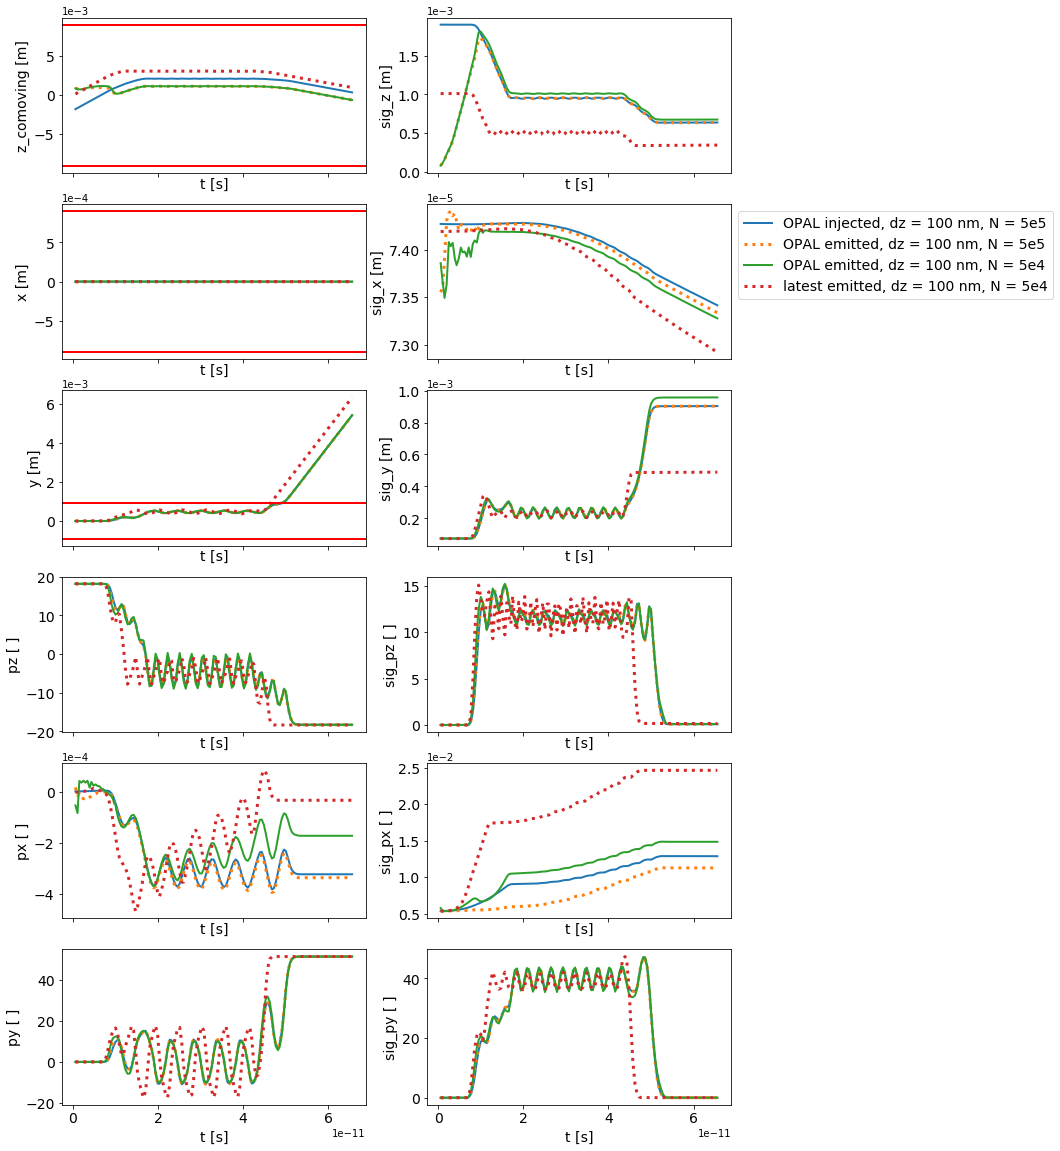

In [5]:
names = [ 'z_comoving', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
dotted = [1,3,6]  # Indexes from fnames to plot with dotted lines
Ls = [1.8e-3, 1.8e-3, .085e-3]
Ls[2] *= 212.35  # * gamma_
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], color = j%(len(stats)), lw = lw, ls = ls )
        legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
axs[1,1].legend(legLocal, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw mesh limits
for j in range(3):
    i  = (2 + j) % 3
    print(-.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()


In [5]:
# Screen data
r_data = raw_data[2]
[data, screens] = pmf.importScreen( r_data[0] + '/bunch-profile/bunch-p#-screen#.txt', show = True )

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
0 tests/new_emitted_5e4/bunch-profile/bunch-p#-screen0.txt


1 tests/new_emitted_5e4/bunch-profile/bunch-p#-screen1.txt


Screens at  [-0.8, 2.2]


num particles =  50000


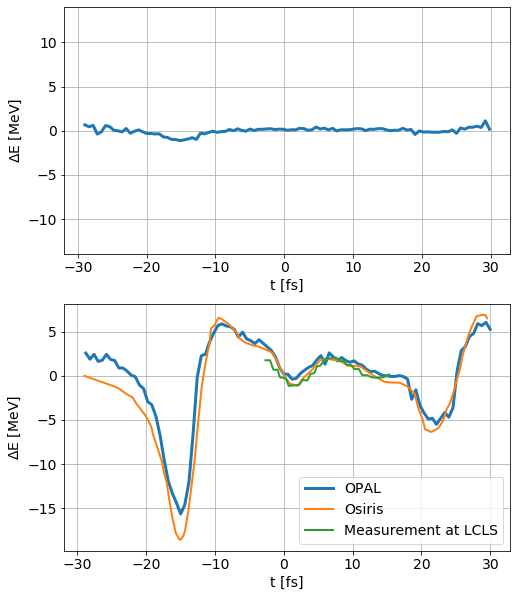

In [7]:
# Plot all screens for one folder
if len(screens) > 1:
    fig, ax = plt.subplots( len(screens), 1, figsize = ( 8, 5*len(screens) ), sharey = False, sharex = False )
    ax = ax.reshape(-1)
    for i in range(len(screens)):
        ax[i].grid()
        [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = i, type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 1, lw = 3)
    # Get data from paper
    osiris = pd.read_csv('Osiris.csv', names = ['t', 'dE'])
    osiris = osiris.sort_values( by = ['t']  )
    meas = pd.read_csv('Measurement.csv', names = ['t', 'dE'])
    meas = meas.sort_values( by = ['t']  )
    ax[-1].plot(osiris['t'] - 29, osiris['dE'], lw = 2)
    ax[-1].plot(meas['t'] - 29, meas['dE'], lw = 2)
    # ax[-1].scatter(meas['t'] - 29, meas['dE'], s = 40, marker = 'o', color = 'k')
    ax[-1].legend(['OPAL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)
    # Comment block above to avoid plotting data from macArthur
    pmf.adjust_axes_limits( ax, 'x' )
    pmf.adjust_axes_limits( ax, 'y' )
    
else:
    fig, ax = plt.subplots( 1, 1, figsize = ( 10, 4 ), sharey = False, sharex = False )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'y'], screenNum = 0, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = 1)

print('num particles = ', len(x))        
# fig.suptitle(r_data[0] + ', ' + r_data[1], fontsize = fs)
plt.savefig( (pltpath + '/comparison6.png'), bbox_inches='tight' )    
plt.show()

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/new_injected/bunch-profile/bunch-p#-screen1.txt


Screens at  [2.2]


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/new_emitted/bunch-profile/bunch-p#-screen1.txt


Screens at  [2.2]


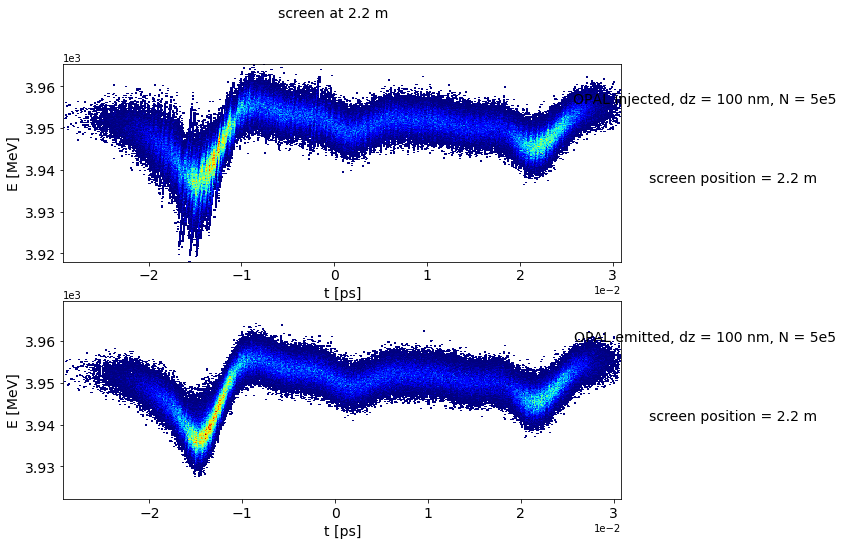

In [15]:
# Plot one screen for several examples
screen_to_plot = 1  # Index of screen to plot
examples = [0,1]  # Indexes of fnames to plot

fig, ax = plt.subplots( len(examples), 1, figsize = ( 10, 4*len(examples) )) 
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-profile/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = screen_to_plot, type = 'hist2d', factors = [-1e12,1e-6], nbins = 500, color = 1) 
    ax[i].text( 1.15, .8, raw_data[ex][1], transform=ax[i].transAxes, fontsize = fs, ha='center' )

pmf.adjust_axes_limits( ax, 'x' )
pmf.adjust_axes_limits( ax, 'y' )
fig.suptitle('screen at ' + str(screens[0]) + ' m', fontsize = fs)
# plt.savefig( (pltpath + '/compare_all.png'), bbox_inches='tight' )    
plt.show()

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/new_injected/bunch-profile/bunch-p#-screen1.txt


Screens at  [2.2]


../../../plotMithraPy/plotMiFuncs.py:381: RuntimeWarning: Mean of empty slice.
  bin_means = [y[digitized == i].mean() for i in range(1, len(bin_edges))]
/home/arnau/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/new_emitted/bunch-profile/bunch-p#-screen1.txt


Screens at  [2.2]


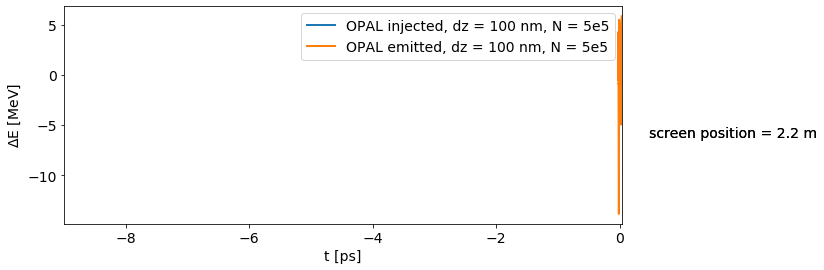

In [12]:
# Plot one screen for several examples, ALL IN ONE SAME FIGURE
screen_to_plot = 1  # Index of screen to plot
examples = [0,1]  # Indexes of fnames to plot

fig, ax = plt.subplots( figsize = ( 10, 4) ) 
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-profile/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)
ax.legend( [raw_data[i][1] for i in examples], fontsize = fs, bbox_to_anchor = [1.,1.]) 
ax.set_xlim(left = -9)
#fig.suptitle('no wiggler, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC', fontsize = fs)
plt.savefig( (pltpath + '/compare_pencil_SC.png'), bbox_inches='tight' )    
plt.show()


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
1 tests/test_condition=pencil_noWiggler/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.88]


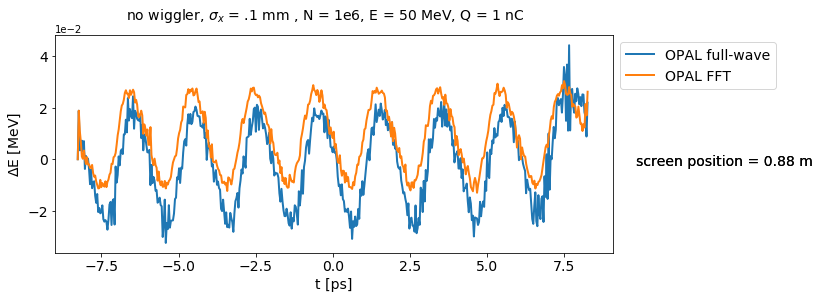

In [20]:
# Plot comparison with the OPAL FFT solver
screen_to_plot = 1  # Index of screen to plot
examples = [0,1,2,3,4,5]  # Indexes of fnames to plot
examples = [0]

fig, ax = plt.subplots( figsize = ( 10, 4) ) 
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-screen/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)

# Now plot the profile imported from OPAL
df = pd.read_csv('opalScreen2', sep='\t', header = None, index_col = False, names = ['t', 'E'])
df['E'] = df['E'].apply(lambda x: x*1e6)
[x,y] = pmf.plotScreen( ax, df, ['t', 'E'], screenNum = 0.88, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)
ax.legend( ['OPAL full-wave', 'OPAL FFT'], fontsize = fs, bbox_to_anchor = [1.,1.])
ax.set_xlim(left = -9)
fig.suptitle('no wiggler, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC', fontsize = fs)
plt.savefig( (pltpath + '/bench_mark.png'), bbox_inches='tight' )    
plt.show()

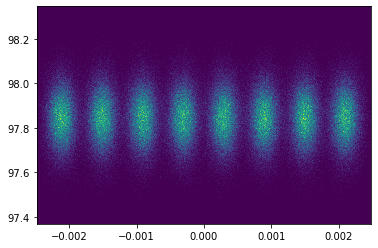

In [87]:
# plot initial input distro .csv
init = pd.read_csv('tests/test_gg_smallDeltaE_noWiggler/multiGauss.csv', sep = '\t', skiprows = 1, names = ['x', 'px', 'y', 'py', 'z', 'pz'] )
plt.hist2d(init['z'], init['pz'], bins = 500)
plt.show()

columns =  ['q', 'x', 'y', 'z', 'px', 'py', 'pz']
time steps =  [266]
num processors =  2
0 tests/twocoretest/bunch-normal-profile/bunch-p#-266.txt


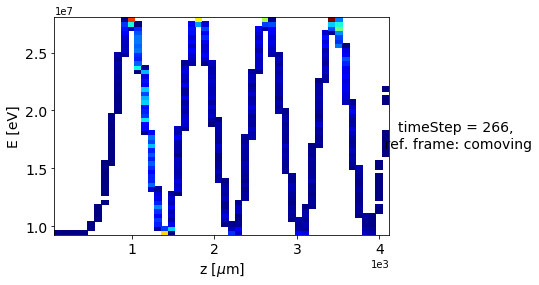

In [130]:
[data, ts] = pmf.importProfile( raw_data[0][0] + '/bunch-normal-profile/bunch-p#-#.txt', show = True )
fig, ax = plt.subplots()
[x,y] = pmf.plotProfile( ax, data, ['z', 'E'], timeStep = 266, type = 'hist2d', factors = [1e6,1], nbins = 50, color = 1)
#ax.set_xlim(left=-800, right = 10)
plt.show()
